In [3]:
from google.colab import files
import zipfile
import os

# Upload your two folders as a single zip (cats.zip, dogs.zip)
uploaded = files.upload()


Saving cats.zip to cats.zip
Saving dogs.zip to dogs.zip


In [4]:
# Create main folder
os.makedirs("images", exist_ok=True)

# Unzip cats
with zipfile.ZipFile("cats.zip", 'r') as zip_ref:
    zip_ref.extractall("images/")

# Unzip dogs
with zipfile.ZipFile("dogs.zip", 'r') as zip_ref:
    zip_ref.extractall("images/")

# Now you have: images/cats/ and images/dogs/


Accuracy: 0.5


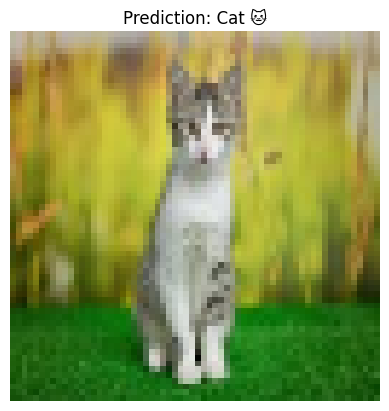

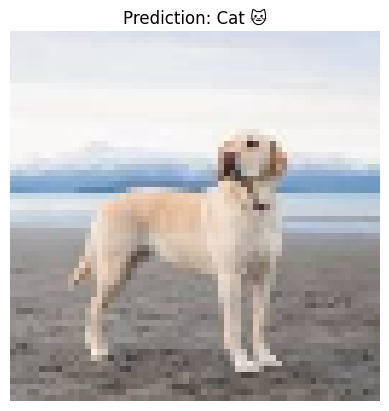

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

IMG_SIZE = 64

def load_images_from_folder(folder, label):
    data, labels, images = [], [], []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
            data.append(gray.flatten())
            labels.append(label)
            images.append(img_resized)
    return data, labels, images

# 🔽 Change paths here to your uploaded folders
cats, y_cats, cat_imgs = load_images_from_folder("images/cats", 0)
dogs, y_dogs, dog_imgs = load_images_from_folder("images/dogs", 1)

# Combine
X = np.array(cats + dogs)
y = np.array(y_cats + y_dogs)
all_imgs = cat_imgs + dog_imgs

# Train/Test Split
X_train, X_test, y_train, y_test, img_train, img_test = train_test_split(
    X, y, all_imgs, test_size=0.5, random_state=42
)

# Train SVM
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Show test results
for i in range(len(img_test)):
    plt.imshow(cv2.cvtColor(img_test[i], cv2.COLOR_BGR2RGB))
    plt.title("Prediction: " + ("Dog 🐶" if y_pred[i] == 1 else "Cat 🐱"))
    plt.axis("off")
    plt.show()
